#Ridge Regression

Given dataset $$S = \{(X_1, Y_1), (X_2, Y_2), ..., (X_n, Y_N)\}$$ we want to solve the Tikhonov minimization problem with square loss:

$$min\frac{1}{2}\sum\limits_{i=1}^n(f(X_i)-Y_i)^2 + \frac{\lambda}{2}||f||_k^2$$ where f is the regression function. According to [representer theorem](http://alex.smola.org/papers/2001/SchHerSmo01.pdf), the solution can be written as:

$$f = \sum\limits_{i=1}^nc_ik(X_i,\cdot)$$

So the formulation can be rewritten as $$min\frac{1}{2}\sum\limits_{i=1}^n(Y-Kc)^2 + \frac{\lambda}{2}c^tKc$$ K is the kernel matrix whose j-th element on i-th row is $k(X_i, X_j)$.

The closed-form solution to this minimization problem is given as $c^* = (K+\lambda I)^{-1}Y$. When we have a new piece of data $X^*$, the model will predict the output via $f(X^*) = \sum ck(X_i,X^*) = Y^t(K+\lambda I)^{-1}k(X,X^*)$.

Solving the inverse of a matrix is computationally expensive. Alternatively we try to perform eigendecomposition of $K$ first and use the decomposed matrix to calculate $c$.

Suppose $G = K + \lambda I$, and the eigendecomposition of $K$ can be written as $Q\Lambda Q^t$ where $Q$ is a orthogonal matrix, and $\Lambda$ is diagonal. The decomposition takes $O(n^3)$ time. The inverse can be easily solved after eigendecomposition, and $c^* = Q(\Lambda^{-1}+\lambda I)Q^tY$.


A special case is when we use linear kernel, the problem reduces to linear regression plus an extra L-2 norm regularizer. In this case the regression function becomes a dot product between weights $w$ and new data $X^*$, where $w = (X^tX + \lambda I)^{-1}X^tY$. 

A common approach to find out good penalty parameter $\lambda$ is to apply cross validation. In practice we either define validation sets (when data is enormous) or use **leave-one-out** (when training set is small) to perform CV.

In [94]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import numpy as np
from sklearn.preprocessing import RobustScaler

boston = load_boston()

X = boston.data

##split training, validation and testing set. only use one validation set (not CV) just to demonstrate the idea
boston_X_train = X[:-250]
boston_X_val = X[-250:-100]
boston_X_test = X[-100:]

boston_Y_train = boston.target[:-250]
boston_Y_val = boston.target[-250:-100]
boston_Y_test = boston.target[-100:]

In [95]:
###fit model using training data
alpha = 1.0
U, s, Vt = np.linalg.svd(boston_X_train, full_matrices=False)
temp = np.diag(s/(s*s+alpha))
w = np.dot(np.dot(np.transpose(Vt), np.dot(temp, np.transpose(U))), boston_Y_train)

In [96]:
predicts = np.dot(boston_X_test, w)
print np.mean((predicts - boston_Y_test) ** 2)

128.254245632


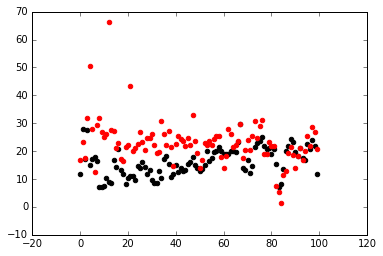

In [97]:
# Plot outputs
plt.scatter(range(len(boston_Y_test)), boston_Y_test,  color='black')
plt.scatter(range(len(predicts)), predicts,  color='red')

In [98]:
alpha = 0.01
U, s, Vt = np.linalg.svd(boston_X_train, full_matrices=False)
alpha_opt = alpha
val_cost = np.inf
while alpha <= 10000:
    temp = np.diag(s/(s*s+alpha))
    w = np.dot(np.dot(np.transpose(Vt), np.dot(temp, np.transpose(U))), boston_Y_train)
    predicts = np.dot(boston_X_val, w)
    new_val_cost = np.mean((predicts - boston_Y_val) ** 2)
    if new_val_cost < val_cost:
        val_cost = new_val_cost
        alpha_opt = alpha
        
    print "validation error is ", val_cost, " when alpha is ", alpha
    alpha *= 2

print "best regularization parameter is: ", alpha_opt

validation error is  347.939901981  when alpha is  0.01
validation error is  342.821678984  when alpha is  0.02
validation error is  333.087470488  when alpha is  0.04
validation error is  315.427301925  when alpha is  0.08
validation error is  286.031981616  when alpha is  0.16
validation error is  243.744549481  when alpha is  0.32
validation error is  194.890426535  when alpha is  0.64
validation error is  152.294130171  when alpha is  1.28
validation error is  125.273670565  when alpha is  2.56
validation error is  114.792173635  when alpha is  5.12
validation error is  114.792173635  when alpha is  10.24
validation error is  114.792173635  when alpha is  20.48
validation error is  114.792173635  when alpha is  40.96
validation error is  114.792173635  when alpha is  81.92
validation error is  114.792173635  when alpha is  163.84
validation error is  114.792173635  when alpha is  327.68
validation error is  107.444029409  when alpha is  655.36
validation error is  89.4185714182  wh

Reference: [technical report](http://cbcl.mit.edu/projects/cbcl/publications/ps/MIT-CSAIL-TR-2007-025.pdf)